# One dimensional Neural Network

In [532]:
from neuralnetwork.datasets import blobs, nregion, circle
from neuralnetwork import Network

Layer: L0, Neurons: 1, Activation: None, Weights: (0, 0), Biases: (0, 0)
Layer: L1, Neurons: 16, Activation: absolute, Weights: (16, 1), Biases: (16, 1)
Layer: L2, Neurons: 16, Activation: relu, Weights: (16, 16), Biases: (16, 1)
Layer: L3, Neurons: 1, Activation: sigmoid, Weights: (1, 16), Biases: (1, 1)


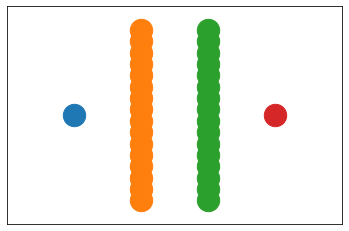

In [533]:
# Example Network
mynetwork = Network(1)
mynetwork.add_layer(16, activation = 'absolute' )
mynetwork.add_layer(16, activation = 'relu')
mynetwork.add_layer(1, activation = 'sigmoid')
mynetwork.summary()

# Simple Prediction

# Load Dataset

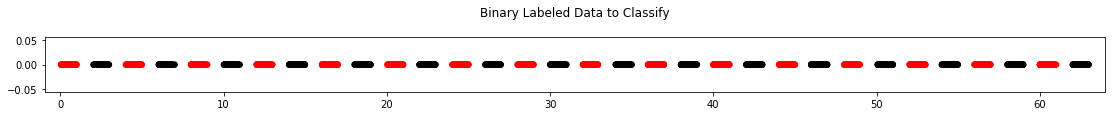

In [534]:
X,Y,C = nregion.load_data(regions = 32)
R = [0.5 for x in C]
#X = X*3
#Y = Y*3
#C = [x*3 for x in C]
#R = [x*3 for x in R]
nregion.graph(X,Y)

In [535]:
print(R)

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [536]:
len(C)

16

# N region initialization

In [537]:
import numpy as np

In [538]:
# Change the slopes of first layer to 1
mynetwork.layers['L1']['weights'] = np.ones_like(mynetwork.layers['L1']['weights'])
mynetwork.layers['L1']['weights']

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [539]:
# Change the biases to the list of centers
mynetwork.layers['L1']['biases'] = -np.array(C).reshape(mynetwork.layers['L1']['biases'].shape)
mynetwork.layers['L1']['biases']

array([[ -2.5],
       [ -6.5],
       [-10.5],
       [-14.5],
       [-18.5],
       [-22.5],
       [-26.5],
       [-30.5],
       [-34.5],
       [-38.5],
       [-42.5],
       [-46.5],
       [-50.5],
       [-54.5],
       [-58.5],
       [-62.5]])

In [540]:
mynetwork.layers['L2']['weights'].shape[0]

16

In [541]:
mynetwork.layers['L2']['weights'] = -np.identity(mynetwork.layers['L2']['weights'].shape[0], dtype=None)
mynetwork.layers['L2']['weights']

array([[-1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0.],
       [-0., -1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0.],
       [-0., -0., -1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0.],
       [-0., -0., -0., -1., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0.],
       [-0., -0., -0., -0., -1., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0.],
       [-0., -0., -0., -0., -0., -1., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0., -1., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0., -0., -1., -0., -0., -0., -0., -0.,
        -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0., -0., -0., -1., -0., -0., -0., -0.,
        -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0., -0., -0., -0., -1., -0., -0., -0.,
        -0., -0., -0.],
       [-0., -0., -0., -0., -0

In [542]:
mynetwork.layers['L2']['biases'] = np.array(R).reshape(mynetwork.layers['L2']['biases'].shape)*4
mynetwork.layers['L2']['biases']

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [543]:
mynetwork.layers['L3']['weights'] = np.ones_like(mynetwork.layers['L3']['weights'])
mynetwork.layers['L3']['weights']

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [544]:
mynetwork.layers['L3']['biases'] = -1
mynetwork.layers['L3']['biases']

-1

# Graph the decision boundary

In [545]:
def prediction(x):
    return mynetwork.predict(x)-0.5

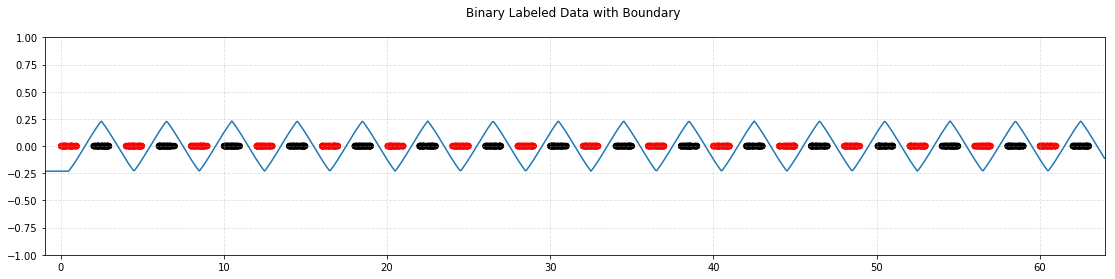

In [546]:
# Graph Decision Boundary
nregion.graph(X, Y, decision = prediction)

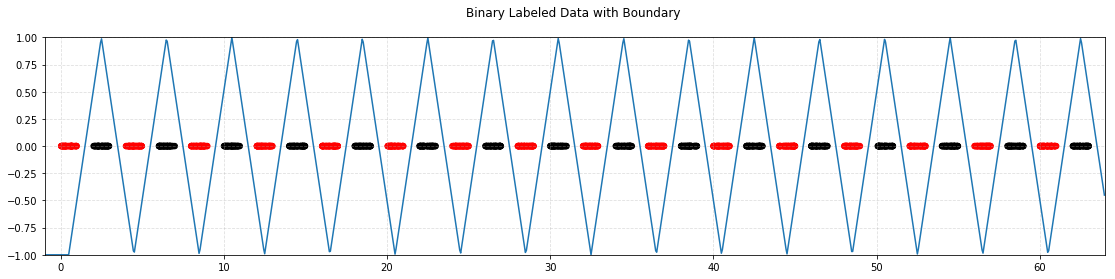

In [547]:
# Graph Decision Boundary
nregion.graph(X, Y, decision = mynetwork.decision)

# Backward pass illusrated

In [548]:
print(f"Loss: {mynetwork.binary_crossentropy_loss(X,Y):.3f} Accuracy: {mynetwork.accuracy(X,Y): 0.0%}")

Loss: 0.390 Accuracy:  100%


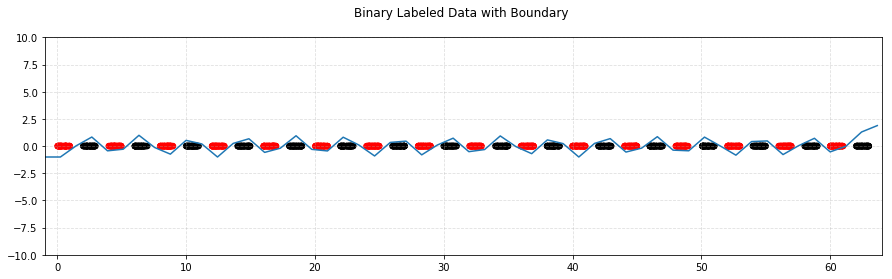

Loss: 0.379 Accuracy:  100%


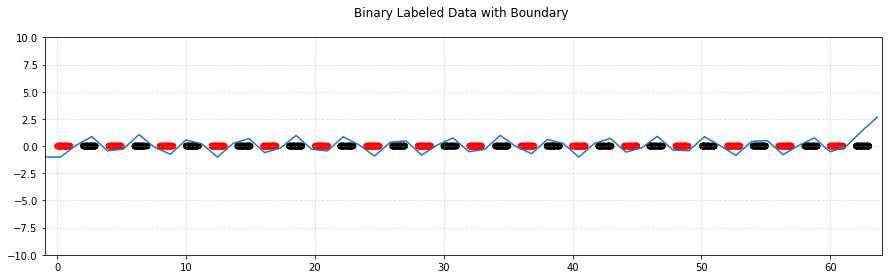

Loss: 0.372 Accuracy:  100%


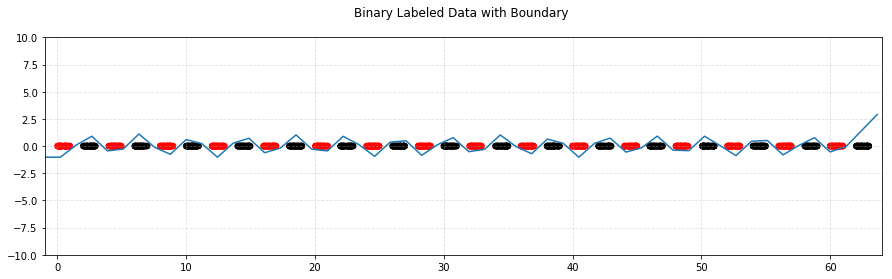

Loss: 0.364 Accuracy:  100%


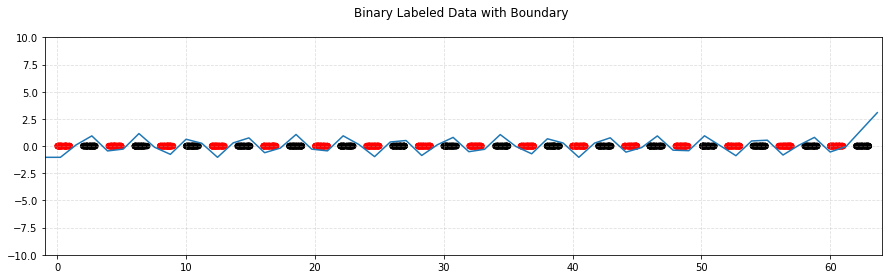

Loss: 0.358 Accuracy:  100%


KeyboardInterrupt: 

In [549]:
import matplotlib.pyplot as plt
decision = mynetwork.decision
for n in range(100):
    mynetwork.train(X, Y, learning_rate=0.001, num_epochs=1000)
    plt.figure(figsize=(15,4))
    plt.scatter(X[:,0], np.zeros(X[:,0].shape), c=Y, cmap='flag', s = 30)

    plt.grid(alpha=.4,linestyle='--')
    X_line = np.arange(min(X[:,0])-1, max(X[:,0])+1, (max(X[:,0])-1 - min(X[:,0])-1)/50)
    X_line_reshape = X_line.reshape(X_line.shape[0],1)
    Y_line = [decision(X_line_reshape[i])[0][0] for i in range(len(X_line_reshape))]
    plt.plot(X_line, Y_line)
    plt.title('Binary Labeled Data with Boundary \n')
    plt.ylim(-10,10)
    plt.xlim(min(X[:,0])-1, max(X[:,0])+1)
    x = np.array(range(100))
    plt.show()
    plt.close()
    print(f"Loss: {mynetwork.binary_crossentropy_loss(X,Y):.3f} Accuracy: {mynetwork.accuracy(X,Y): 0.0%}")



In [ ]:
Y_hat, _ = mynetwork.forward(X)

In [230]:
Y_hat = 

array([[0.0910226 , 0.12687404, 0.0910226 , ..., 0.91941743, 0.99616128,
        0.99678396]])

In [243]:
Y_hat_pred = [0 if y < 0.5 else 1 for y in Y_hat[0]]

In [246]:
accuracy = Y_hat_pred == Y

In [249]:
list(accuracy).count(True)

1600

In [250]:
list(accuracy).count(False)

0

In [251]:
len(Y)

1600